In [1]:
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import os as os
import matplotlib.pyplot as plt
import csv as csv
from datetime import datetime
import time
from scipy.stats import linregress
from sklearn import datasets
from config import OMWeather_API
import pprint

In [2]:
# randomly generate a list of lats and longs
# numpy.random.uniform(low=0.0, high=1.0, size=None)
lat = np.random.uniform(low=-90.00, high=90.00, size=600)
lon = np.random.uniform(low=-180.00, high=180.00, size=600)

In [3]:
latlong = zip(lat, lon)

In [4]:
# Use citipy to generate the a list of the closest cities to your random coordinates. 
cities = []
for c in latlong:
    cities.append(citipy.nearest_city(c[0], c[1]))

In [5]:
city_name=[]
for city in cities:
    name = city.city_name
    city_name.append(name)

In [6]:
# Use Openweather api to get the weather data needed from those cities.
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
names = []
country = []
date = []

# Loop through cities making the API call
i = 1
for city in city_name:
    city=city
    query_url = url + "appid=" + OMWeather_API + "&q=" + city
    response = requests.get(query_url).json()
    
    # extracting data and cleaning data
# print cleaned data
    try:
        
        clouds.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        temps.append(response["main"]['temp'])
        humid.append(response["main"]['humidity'])
        lats.append(response["coord"]["lat"])  
        lons.append(response["coord"]["lon"])
        winds.append(response["wind"]["speed"])
        names.append(response["name"])
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City name not found.")





        
   

Processing record 1|jamestown
Processing record 2|nuuk
Processing record 3|krasnoselkup
Processing record 4|hobart
Processing record 5|jamestown
Processing record 6|kaniama
Processing record 7|rikitea
Processing record 8|hobart
City name not found.
City name not found.
Processing record 9|tupiza
Processing record 10|qaanaaq
Processing record 11|northam
Processing record 12|shu
Processing record 13|hermanus
Processing record 14|punta arenas
Processing record 15|constitucion
Processing record 16|hobart
Processing record 17|bethel
Processing record 18|mahebourg
Processing record 19|busselton
Processing record 20|lebu
City name not found.
Processing record 21|new norfolk
City name not found.
Processing record 22|rikitea
Processing record 23|tessalit
Processing record 24|bethel
Processing record 25|lagos
Processing record 26|rikitea
Processing record 27|ambon
Processing record 28|yellowknife
Processing record 29|puerto ayora
Processing record 30|albany
Processing record 31|atuona
Processing

Processing record 252|killybegs
Processing record 253|villanueva de la serena
Processing record 254|qaanaaq
Processing record 255|ferme-neuve
Processing record 256|bouna
Processing record 257|vaini
Processing record 258|bluff
Processing record 259|sao filipe
Processing record 260|havelock
Processing record 261|urusha
Processing record 262|atuona
Processing record 263|biak
Processing record 264|hilo
Processing record 265|upata
Processing record 266|albany
City name not found.
Processing record 267|atuona
Processing record 268|ushuaia
Processing record 269|korem
Processing record 270|high level
Processing record 271|arraial do cabo
Processing record 272|sangmelima
Processing record 273|turayf
City name not found.
Processing record 274|namatanai
Processing record 275|gorontalo
City name not found.
Processing record 276|ponta do sol
Processing record 277|kavaratti
Processing record 278|punta arenas
Processing record 279|adrar
Processing record 280|katsuura
Processing record 281|mataura
Pro

Processing record 501|saint george
Processing record 502|havelock
Processing record 503|pumiao
Processing record 504|chifeng
City name not found.
Processing record 505|shitanjing
Processing record 506|carnarvon
Processing record 507|vardo
City name not found.
Processing record 508|brooks
Processing record 509|bredasdorp
Processing record 510|paita
Processing record 511|rio gallegos
Processing record 512|ushuaia
Processing record 513|katsuura
Processing record 514|khor
Processing record 515|faanui
Processing record 516|vila velha
Processing record 517|bajmok
Processing record 518|uyuni
Processing record 519|chokurdakh
Processing record 520|lata
Processing record 521|cape town
Processing record 522|barrow
Processing record 523|namatanai
Processing record 524|shwebo
Processing record 525|dicabisagan
Processing record 526|lavrentiya
Processing record 527|ribeira grande
Processing record 528|butaritari
Processing record 529|petropavlovsk-kamchatskiy
Processing record 530|pandan
City name no

In [7]:
weather = pd.DataFrame({"City": names,
                        "Country": country,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloud Coverage (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weather.head()

,City,Country,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Jamestown,US,277.67,69,90,3.10,42.10,-79.24
1,Nuuk,GL,264.15,47,100,8.70,64.18,-51.72
2,Krasnosel'kup,RU,246.86,86,61,4.86,65.70,82.47
3,Hobart,AU,286.79,76,90,7.20,-42.88,147.33
4,Jamestown,US,277.67,69,90,3.10,42.10,-79.24


In [8]:
len(weather)

549

Export data to csv file for VacationPy

In [9]:
#Exporting data to csv file (will be used for vacation challenge as well)
weather.to_csv("city_list_weather_vacation.csv")

#Display DF
weather.head()

,City,Country,Temperature (F),Humidity (%),Cloud Coverage (%),Wind Speed (mph),Latitude,Longitude
0,Jamestown,US,277.67,69,90,3.10,42.10,-79.24
1,Nuuk,GL,264.15,47,100,8.70,64.18,-51.72
2,Krasnosel'kup,RU,246.86,86,61,4.86,65.70,82.47
3,Hobart,AU,286.79,76,90,7.20,-42.88,147.33
4,Jamestown,US,277.67,69,90,3.10,42.10,-79.24


Scatter Plots for WeatherPy

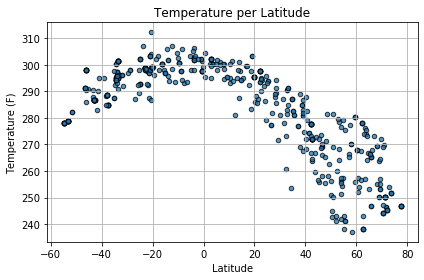

In [10]:
#  df.plot.scatter(x='a', y='b');

weather.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude", alpha=.75, edgecolors="k")
plt.grid(True) 
plt.tight_layout()
plt.savefig('Temp_perLat.png')
plt.show()

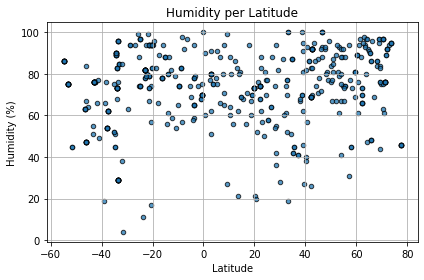

In [11]:
# Humidity (%) vs. Latitude
weather.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude", alpha=.75, edgecolors="k")
plt.grid(True) 
plt.tight_layout()
plt.savefig('HumidityperLat.png')
plt.show()

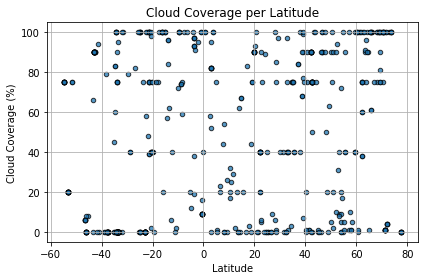

In [12]:
#  Cloudiness (%) vs. Latitude
weather.plot.scatter(x="Latitude", y="Cloud Coverage (%)", title="Cloud Coverage per Latitude", alpha=.75, edgecolors="k")
plt.grid(True) 
plt.tight_layout()
plt.savefig('CloudperLat.png')
plt.show()

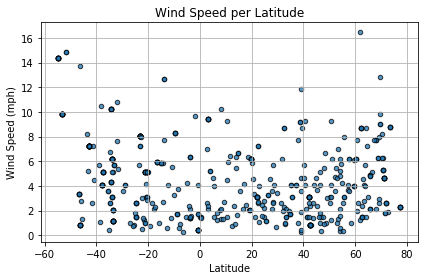

In [13]:
#  Wind Speed (mph) vs. Latitude
weather.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude", alpha=.75, edgecolors="k")
plt.grid(True) 
plt.tight_layout()
plt.savefig('WindperLat.png')
plt.show()

Weather Analysis

Analysis 1: Yes, the temperature does increase significantly between -20 degrees and approx latitude 25 degrees.

Analysis 2: The wind speed seems to drop slightly as well. Lower wind speeds can make a hot climate feel even hotter. This may be based on the time of the year. Since at least latitudes 0 to 90 degrees is currently experiencing spring/early summer.

Analysis 3: The humidity seems to decrease for some areas the further away you get from the equator (0 degrees latitude). Maybe because temperature makes water evaporate? More analysis would be needed to find out why.

Start Northern and Southern Hemisphere Regression models

R squard: -0.14036625768684496


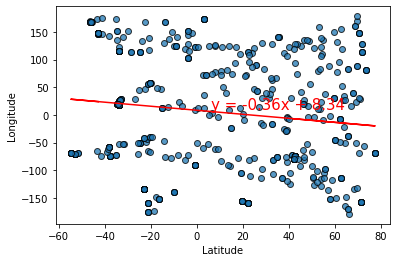

In [14]:
## Convert to floats and store as x and y values
x_values = weather['Latitude'].astype('float')
y_values = weather['Longitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values,alpha=.75, edgecolors="k")

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Longitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

Temperature (F) vs. Latitude Linear Regression

In [15]:
northern = weather.loc[weather["Latitude"] >= 0.0]
northern.reset_index(inplace=True)

southern = weather.loc[weather["Latitude"] < 0.0]
southern.reset_index(inplace=True)

In [16]:
#Northern Hemispere for Temperature Regression
# Define plotting function

def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata,alpha=.75, edgecolors="k")
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)


# Show plot
plt.show()

The r-squared is: -0.8601759631305167


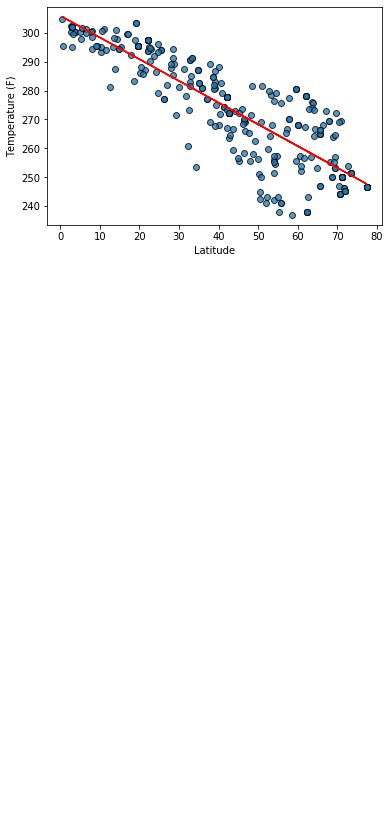

In [18]:
xlbl = "Latitude"
ylbl = "Temperature (F)"
lblpos = (0,25)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,5)
plt.savefig('Temp_perNorthRegression.png')

The r-squared is: 0.7282969440104375


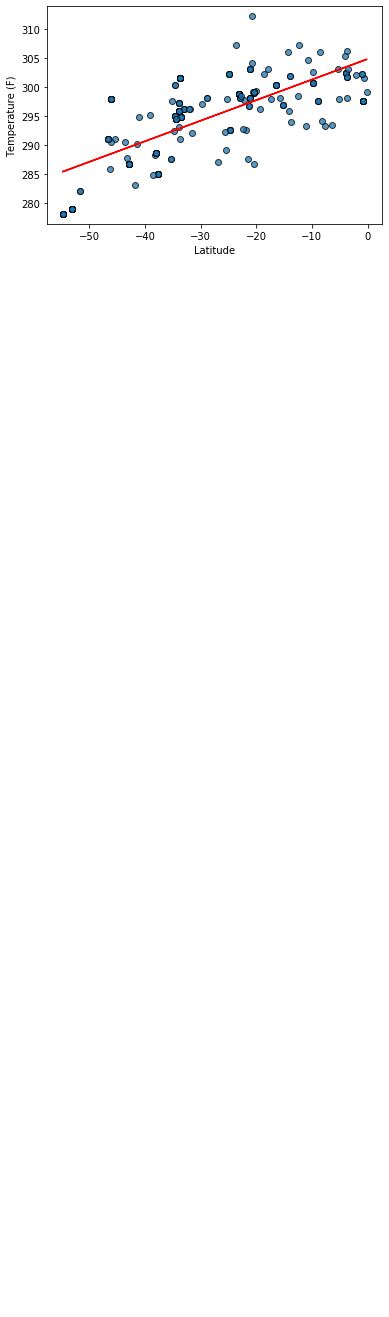

In [19]:
#Souther Hemispere for Temperature Regression


xlbl = "Latitude"
ylbl = "Temperature (F)"
lblpos = (-55,90)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,6)
plt.savefig('Temp_perSouthRegression.png')
# Show plot
plt.show()

Humidity (%) vs. Latitude Linear Regression by Hemishere

The r-squared is: 0.17722036431239657


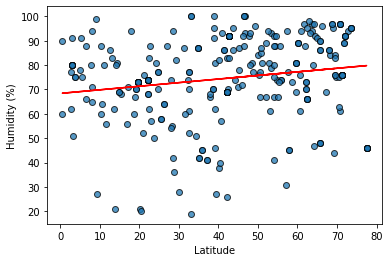

In [20]:

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Humidity_perNorthRegression.png')
# Show plot
plt.show()

The r-squared is: 0.1756025182704279


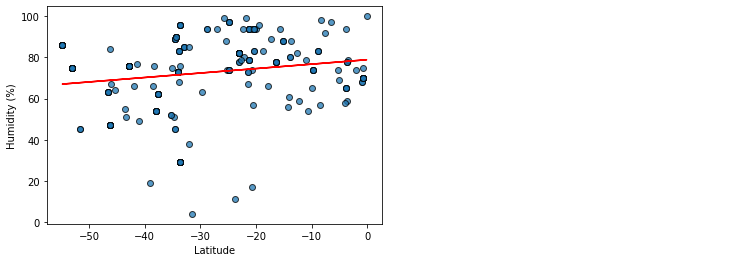

In [21]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Humidity (%)"
lblpos = (45,10)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Humidity_perSouthRegression.png')
# Show plot
plt.show()

Cloudiness (%) vs. Latitude Linear Regression by Hemishere

The r-squared is: 0.12448705900865523


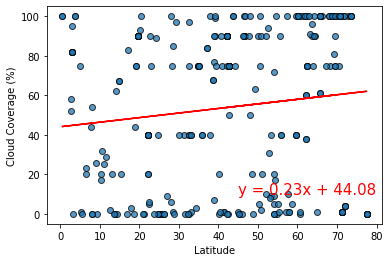

In [22]:

# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloud Coverage (%)"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Cloudiness_perLatRegression.png')
# Show plot
plt.show()

The r-squared is: 0.21038170681993848


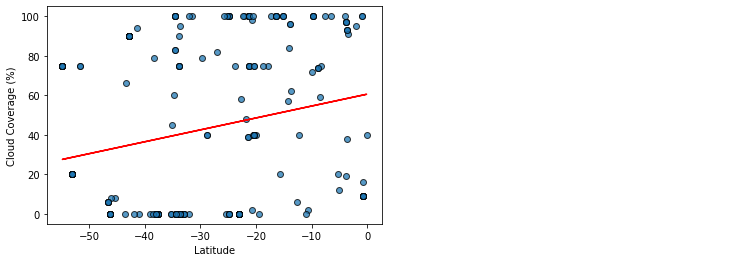

In [23]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Cloud Coverage (%)"
lblpos = (45,10)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Cloudiness_perSouthRegression.png')
# Show plot
plt.show()

Wind Speed (mph) vs. Latitude Linear Regression by Hemishere

The r-squared is: 0.08202459837878463


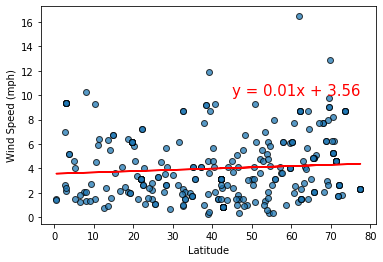

In [24]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
lblpos = (45,10)
plotLinearRegression(northern[xlbl],northern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Wind_perNorthRegression.png')
# Show plot
plt.show()

The r-squared is: -0.4393517900423557


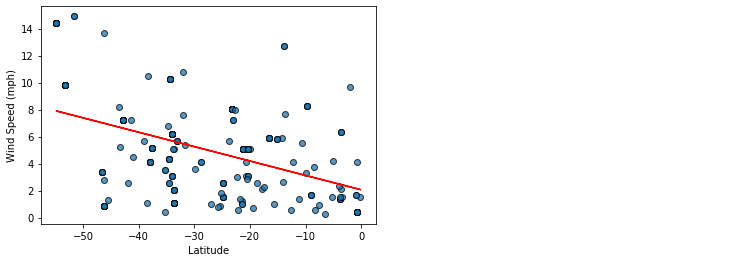

In [25]:
# Souther Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
xlbl = "Latitude"
ylbl = "Wind Speed (mph)"
lblpos = (45,10)
plotLinearRegression(southern[xlbl],southern[ylbl],xlbl,ylbl,lblpos,7)
plt.savefig('Wind_perSouthRegression.png')
# Show plot
plt.show()

Observations

As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases.

It seems that there is no correlation between humidity and latitude.

Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic